# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_data.shape

(2000, 96)

In [11]:
df_data.columns


Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [13]:
df_data.isna().values.any()

True

In [9]:
df_data.isna().any()

ID          False
EARNINGS    False
S           False
EXP         False
FEMALE      False
            ...  
MSA11NO     False
MSA11NCC    False
MSA11CC     False
MSA11NK     False
MSA11NIC    False
Length: 96, dtype: bool

In [15]:
df_data.fillna(0)
df_data.duplicated().values.any()



True

In [16]:
data = df_data.drop_duplicates()


## Descriptive Statistics

In [19]:
data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [21]:
data.describe

<bound method NDFrame.describe of         ID  EARNINGS   S   EXP  FEMALE  MALE  BYEAR  AGE  AGEMBTH   HHINC97  \
0     4275     18.50  12  9.71       0     1   1984   27    24.00 64,000.00   
1     4328     19.23  17  5.71       0     1   1982   29    32.00  6,000.00   
2     8763     39.05  14  9.94       0     1   1981   30    23.00 88,252.00   
3     8879     16.80  18  1.54       0     1   1983   28    30.00       NaN   
4     1994     36.06  15  2.94       0     1   1984   27    23.00 44,188.00   
...    ...       ...  ..   ...     ...   ...    ...  ...      ...       ...   
1984  2400      9.00  12 10.83       1     0   1982   29    29.00 73,100.00   
1989  3018      8.00  12  9.37       1     0   1982   29    23.00 66,300.00   
1991  4550      8.57  17  6.29       1     0   1984   27    25.00 76,300.00   
1994  3779      9.33  12  9.12       1     0   1984   27    22.00       NaN   
1995  2456     14.00   8  7.87       1     0   1982   29    19.00  6,000.00   

      ...  URBAN 

## Visualise the Features

<Figure size 4200x1800 with 0 Axes>

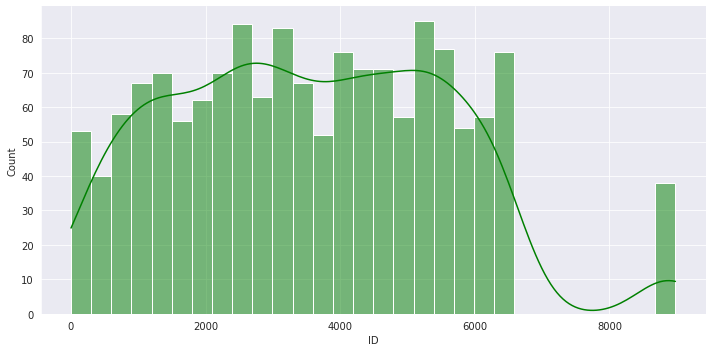

<Figure size 4200x1800 with 0 Axes>

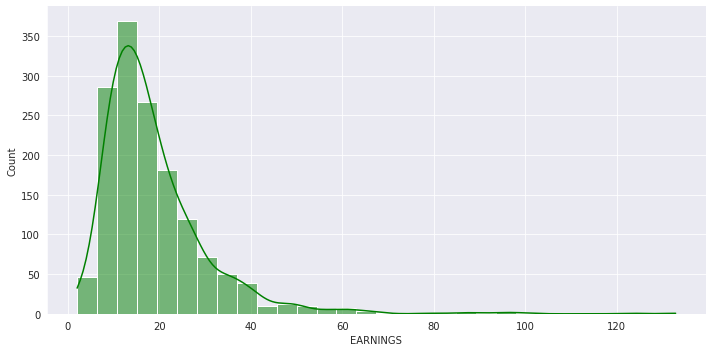

<Figure size 4200x1800 with 0 Axes>

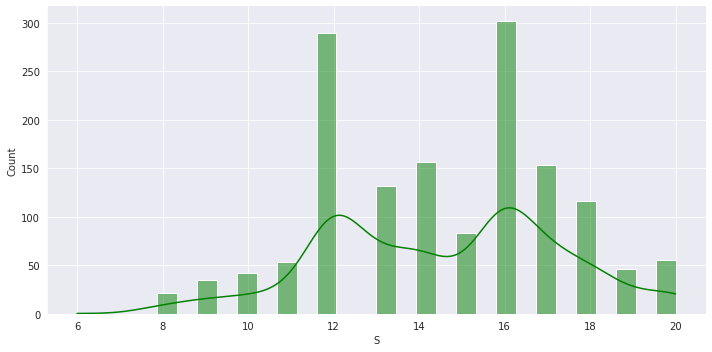

<Figure size 4200x1800 with 0 Axes>

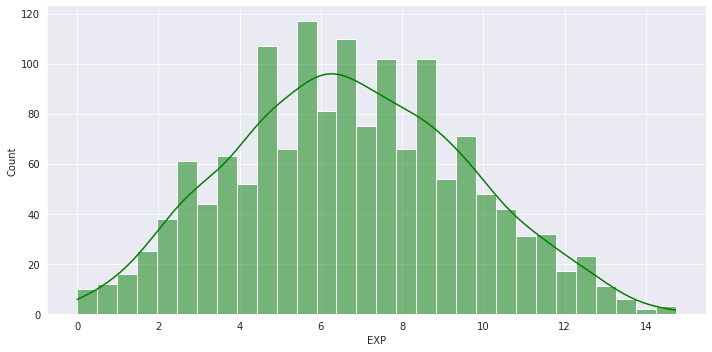

<Figure size 4200x1800 with 0 Axes>

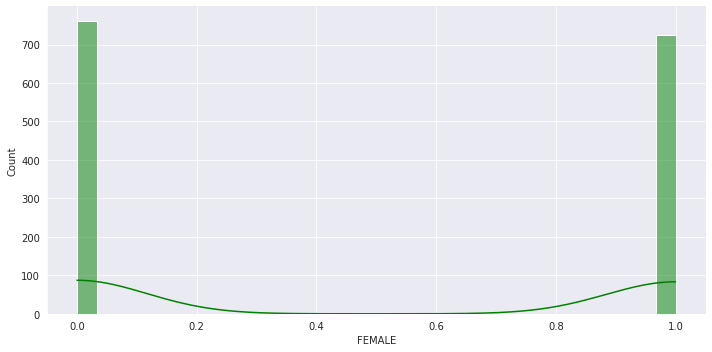

<Figure size 4200x1800 with 0 Axes>

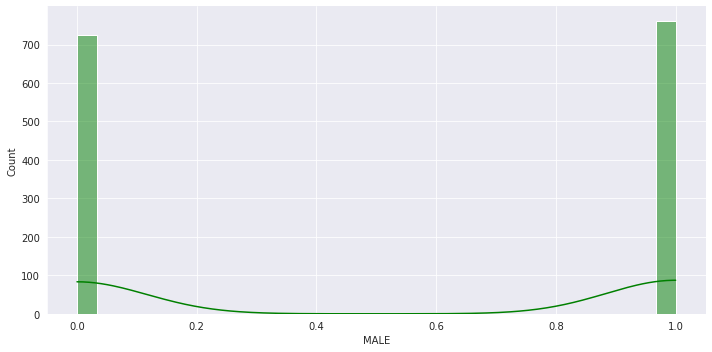

<Figure size 4200x1800 with 0 Axes>

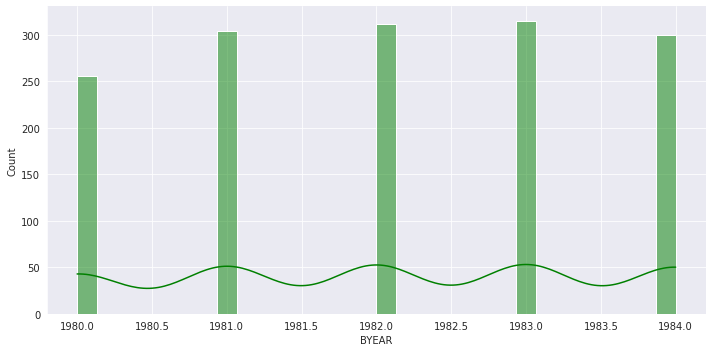

<Figure size 4200x1800 with 0 Axes>

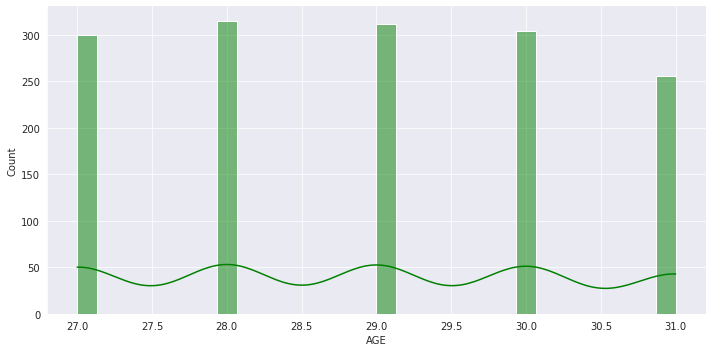

<Figure size 4200x1800 with 0 Axes>

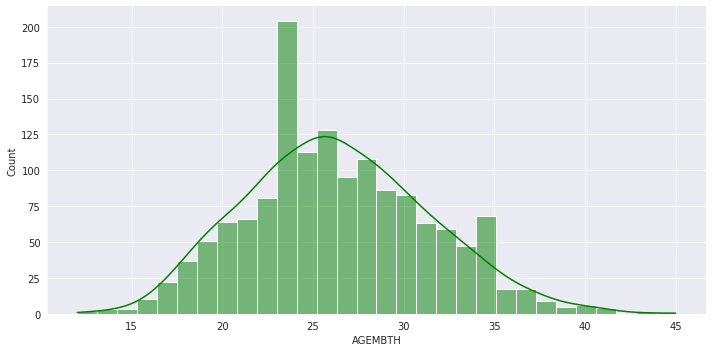

<Figure size 4200x1800 with 0 Axes>

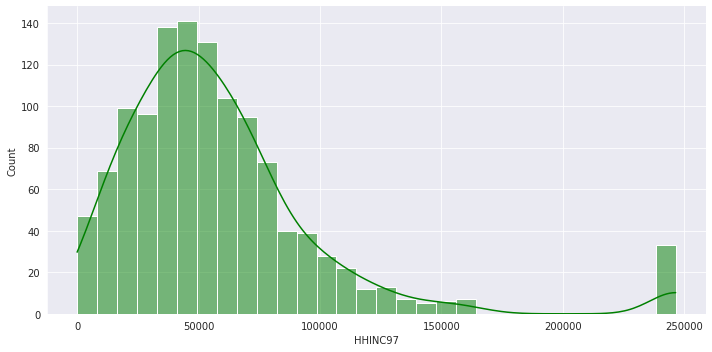

<Figure size 4200x1800 with 0 Axes>

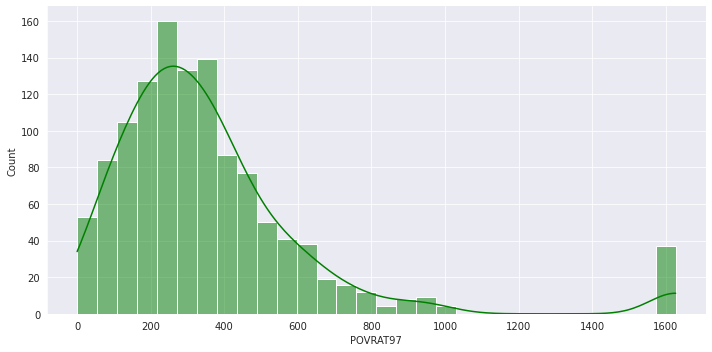

<Figure size 4200x1800 with 0 Axes>

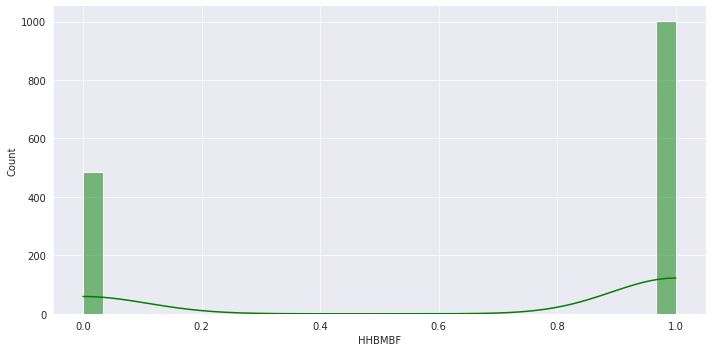

<Figure size 4200x1800 with 0 Axes>

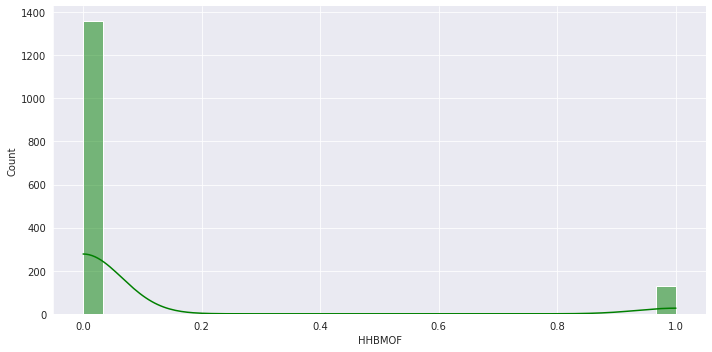

<Figure size 4200x1800 with 0 Axes>

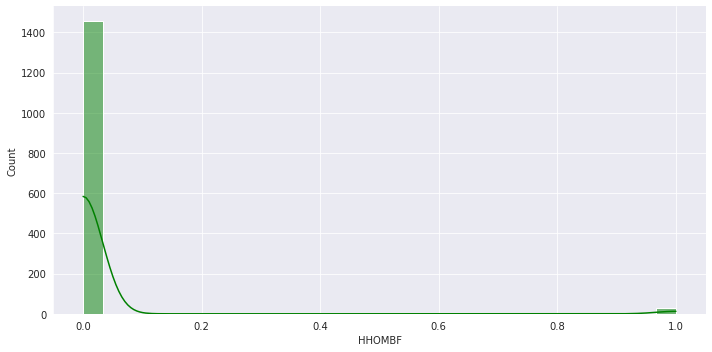

<Figure size 4200x1800 with 0 Axes>

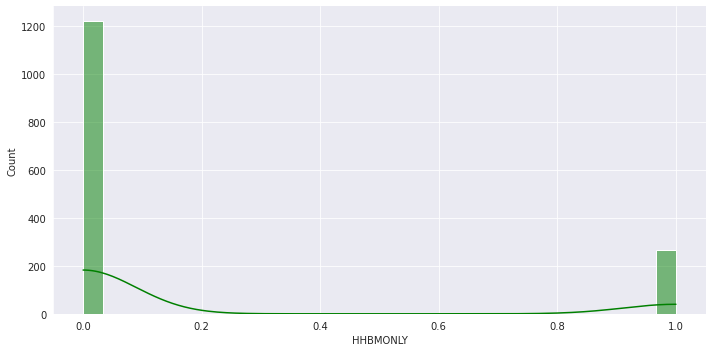

<Figure size 4200x1800 with 0 Axes>

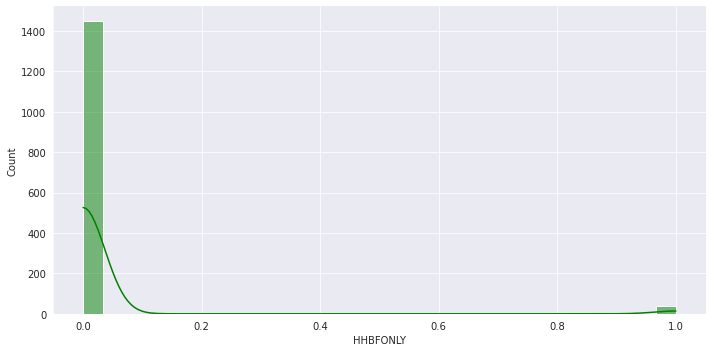

<Figure size 4200x1800 with 0 Axes>

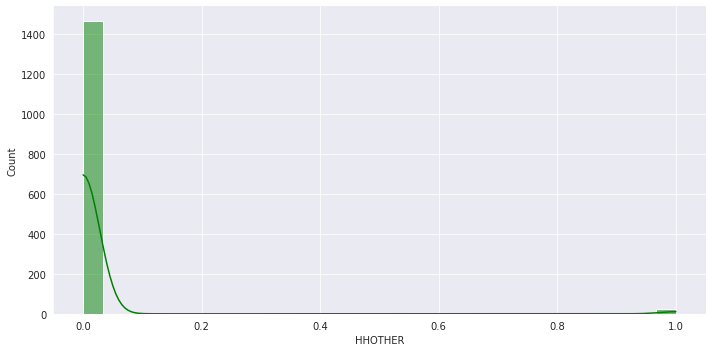

<Figure size 4200x1800 with 0 Axes>

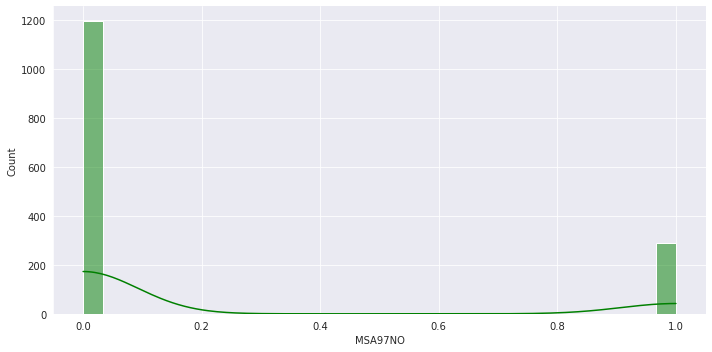

<Figure size 4200x1800 with 0 Axes>

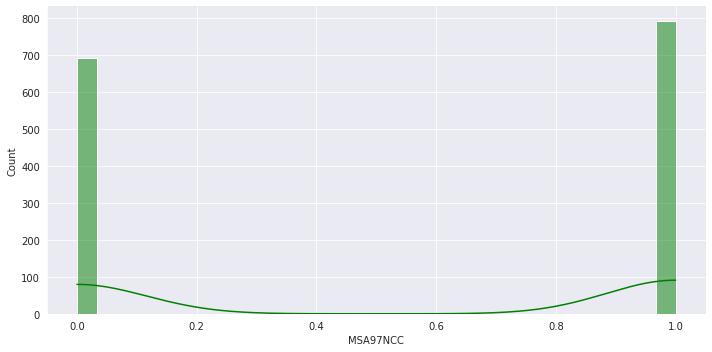

<Figure size 4200x1800 with 0 Axes>

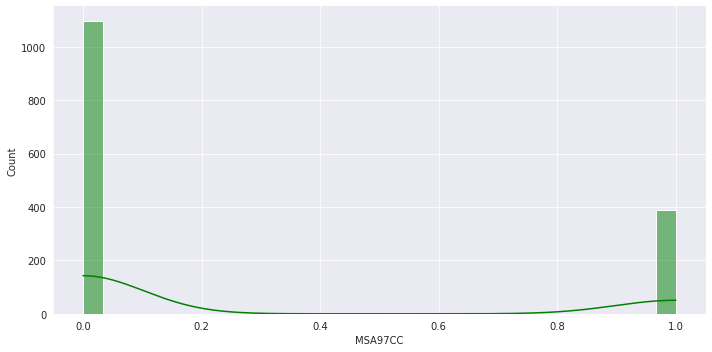

<Figure size 4200x1800 with 0 Axes>

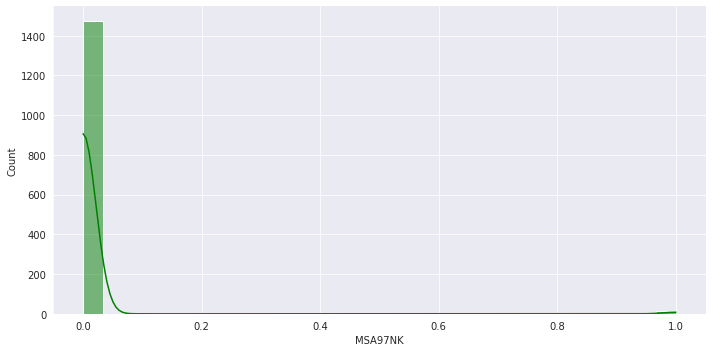

<Figure size 4200x1800 with 0 Axes>

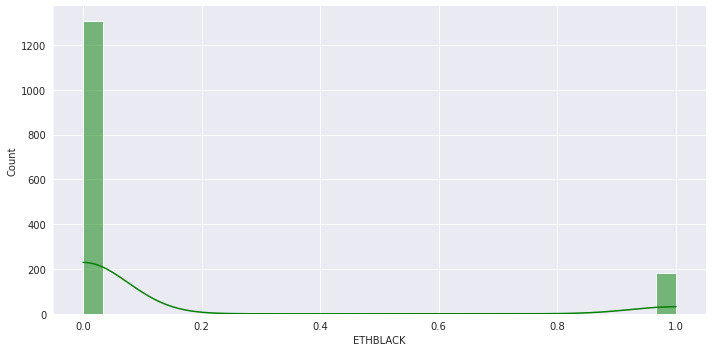

<Figure size 4200x1800 with 0 Axes>

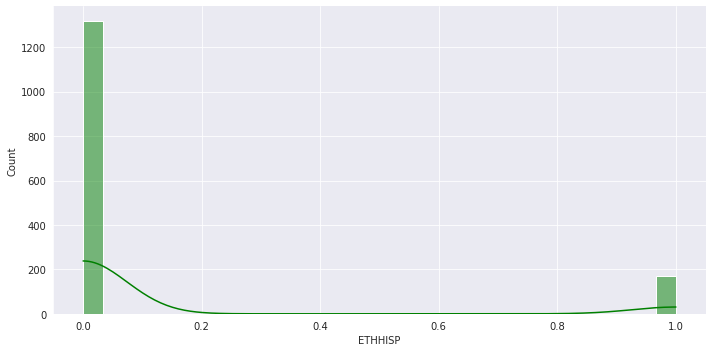

<Figure size 4200x1800 with 0 Axes>

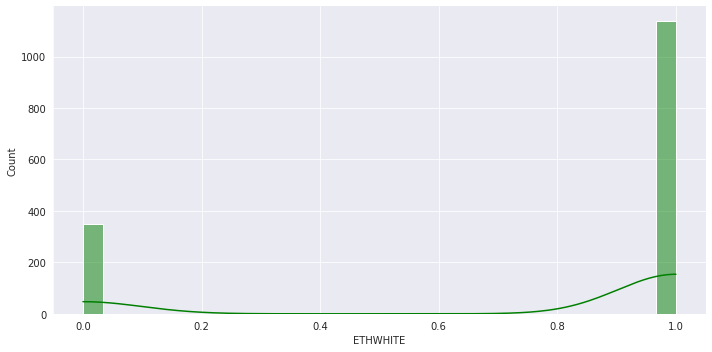

<Figure size 4200x1800 with 0 Axes>

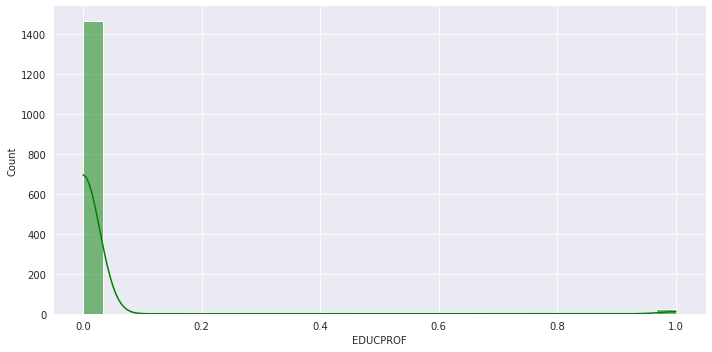

<Figure size 4200x1800 with 0 Axes>

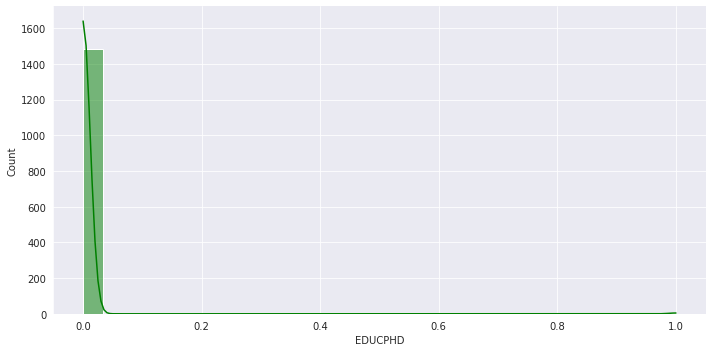

<Figure size 4200x1800 with 0 Axes>

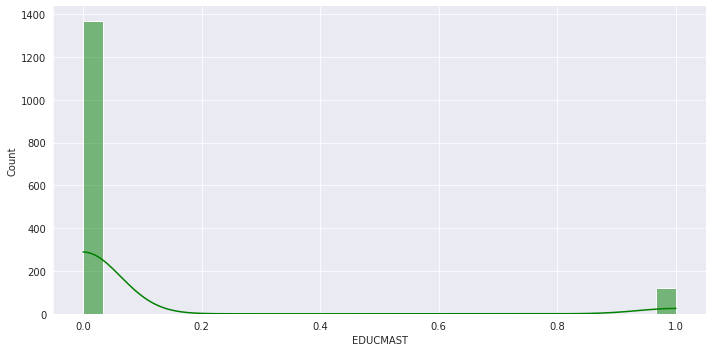

<Figure size 4200x1800 with 0 Axes>

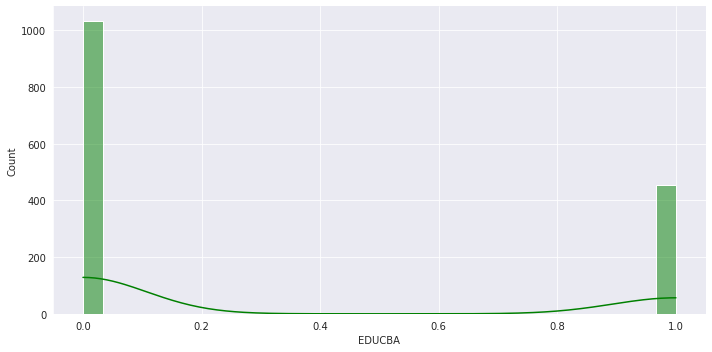

<Figure size 4200x1800 with 0 Axes>

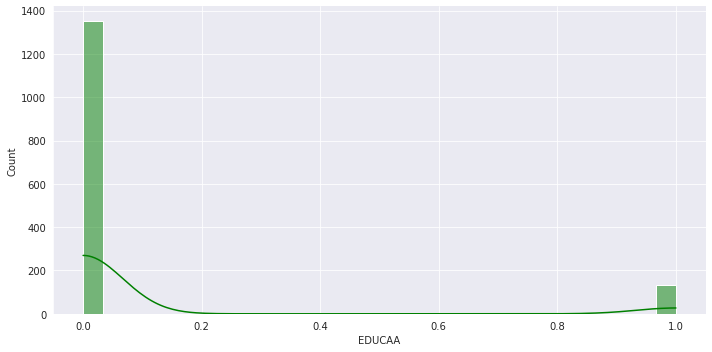

<Figure size 4200x1800 with 0 Axes>

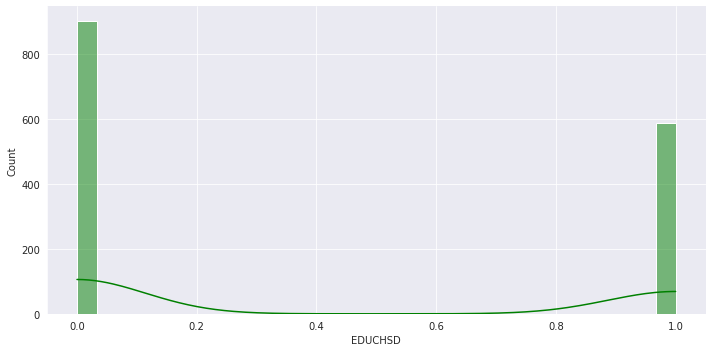

<Figure size 4200x1800 with 0 Axes>

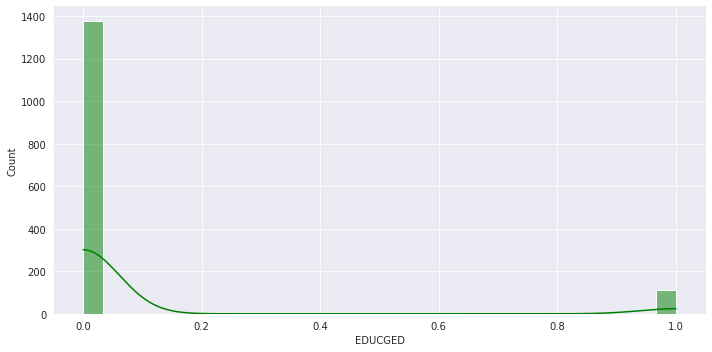

<Figure size 4200x1800 with 0 Axes>

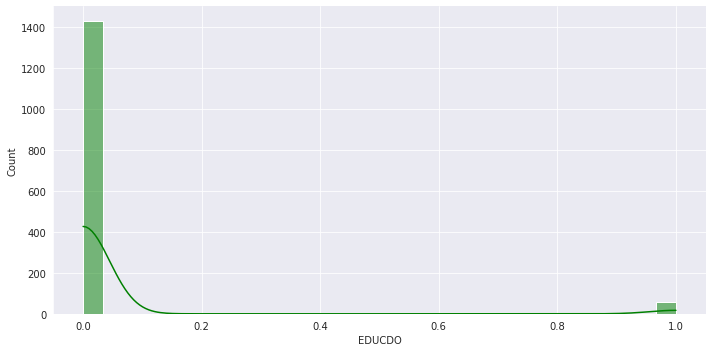

<Figure size 4200x1800 with 0 Axes>

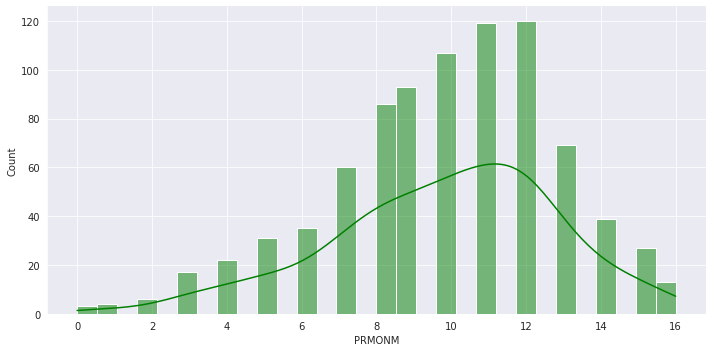

<Figure size 4200x1800 with 0 Axes>

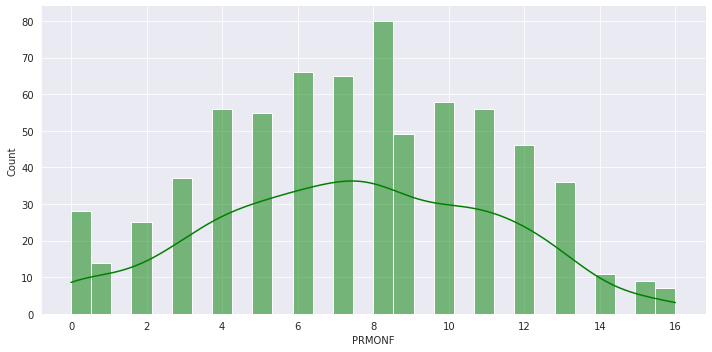

<Figure size 4200x1800 with 0 Axes>

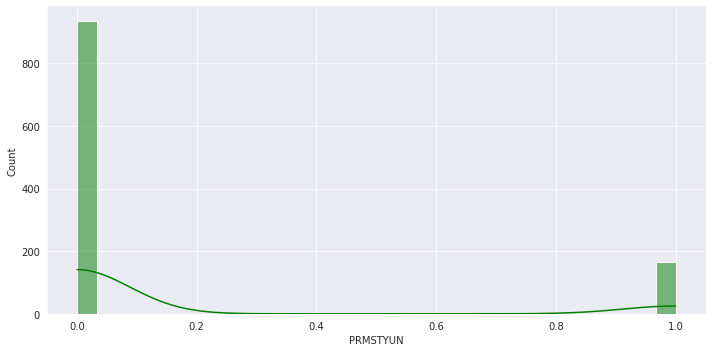

<Figure size 4200x1800 with 0 Axes>

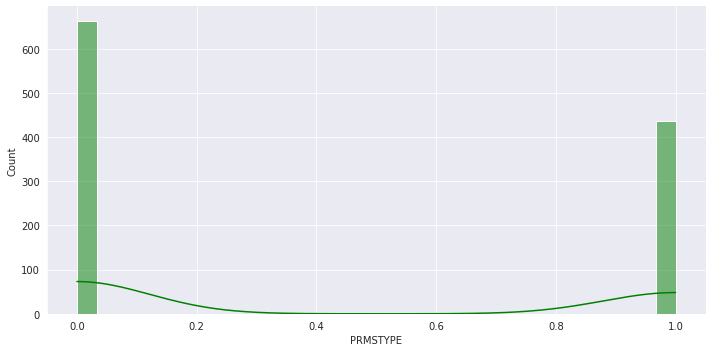

<Figure size 4200x1800 with 0 Axes>

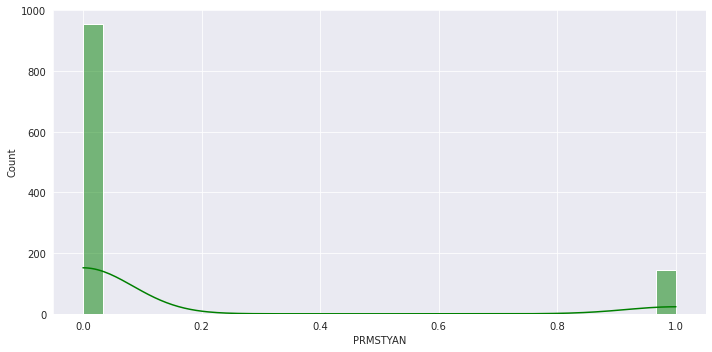

<Figure size 4200x1800 with 0 Axes>

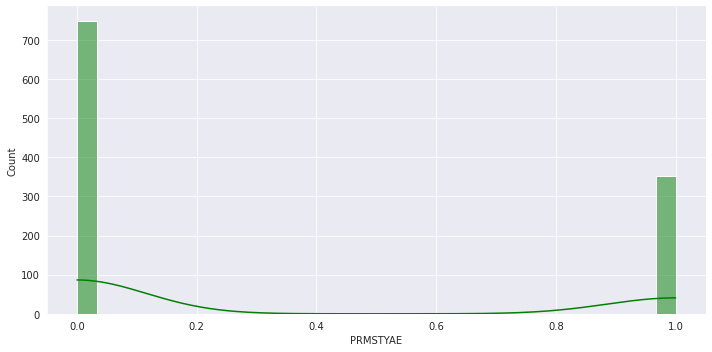

<Figure size 4200x1800 with 0 Axes>

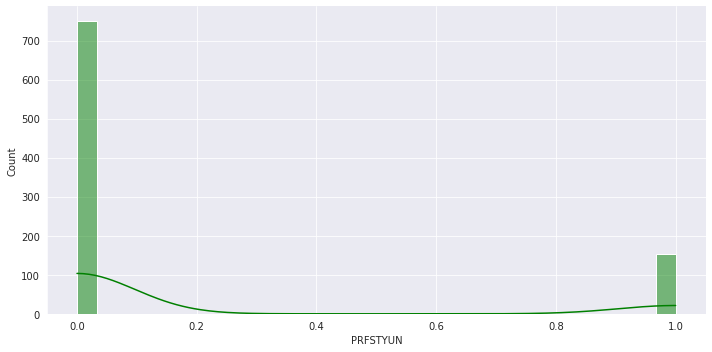

<Figure size 4200x1800 with 0 Axes>

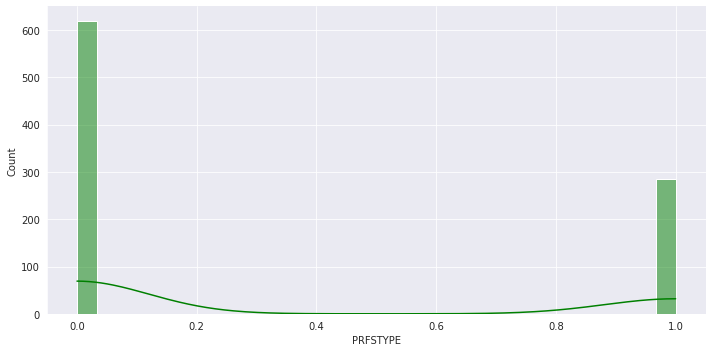

<Figure size 4200x1800 with 0 Axes>

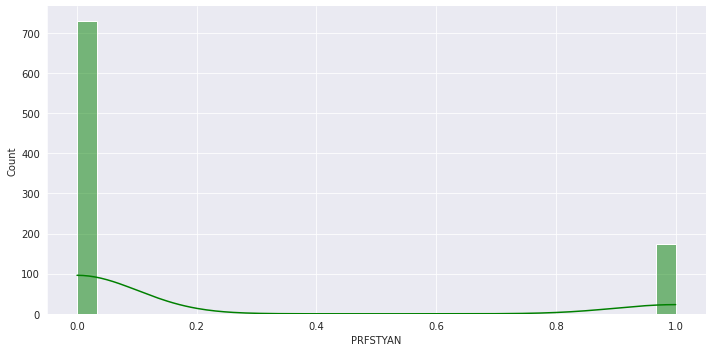

<Figure size 4200x1800 with 0 Axes>

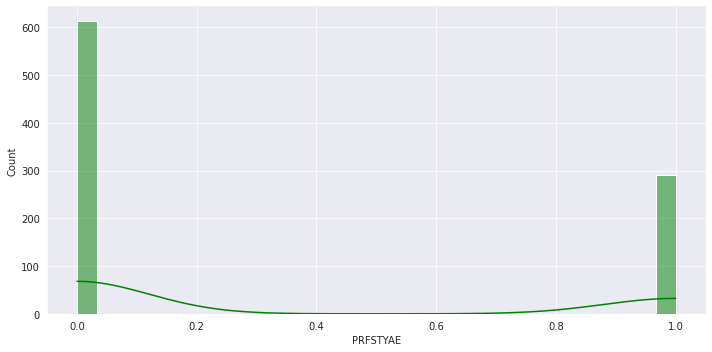

<Figure size 4200x1800 with 0 Axes>

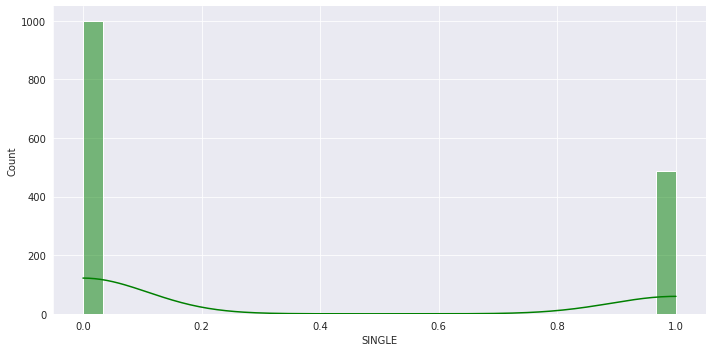

<Figure size 4200x1800 with 0 Axes>

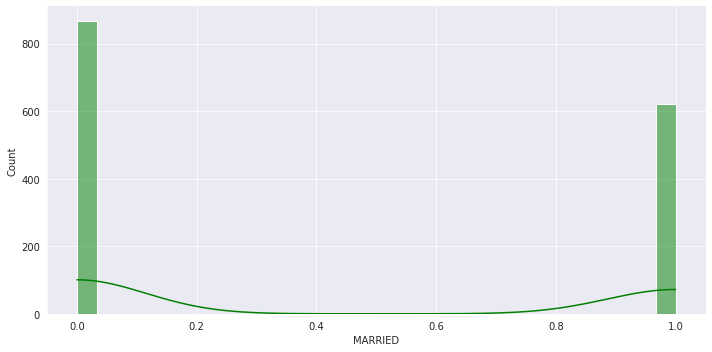

<Figure size 4200x1800 with 0 Axes>

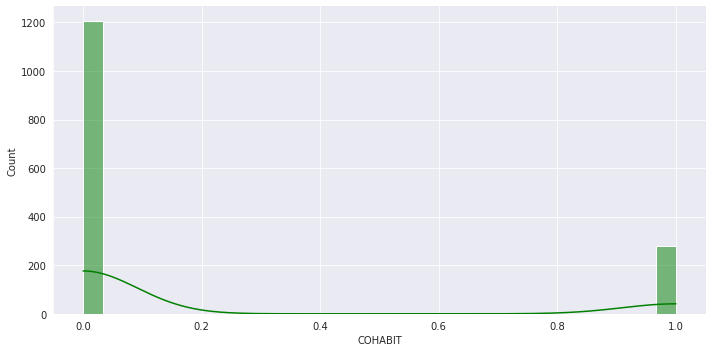

<Figure size 4200x1800 with 0 Axes>

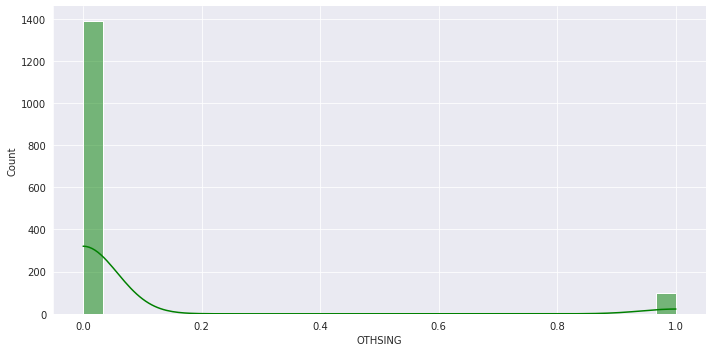

<Figure size 4200x1800 with 0 Axes>

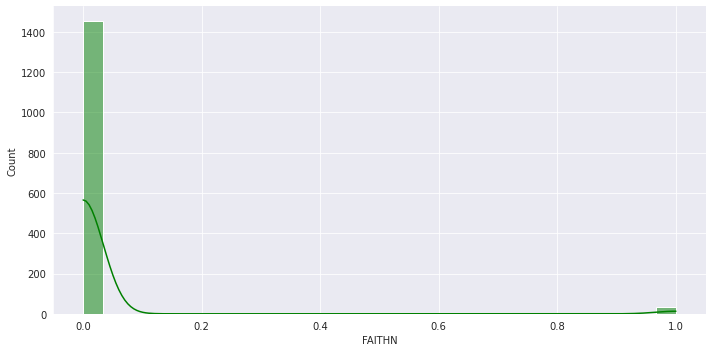

<Figure size 4200x1800 with 0 Axes>

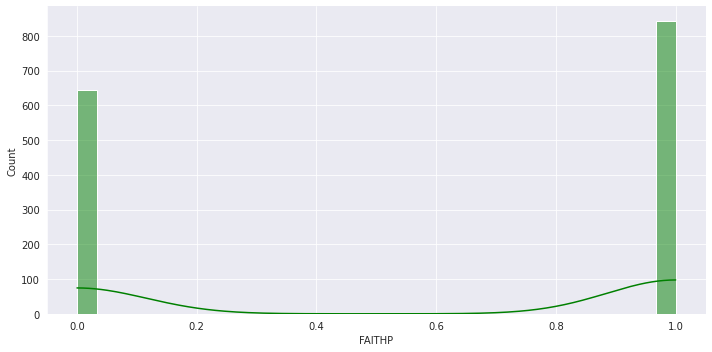

<Figure size 4200x1800 with 0 Axes>

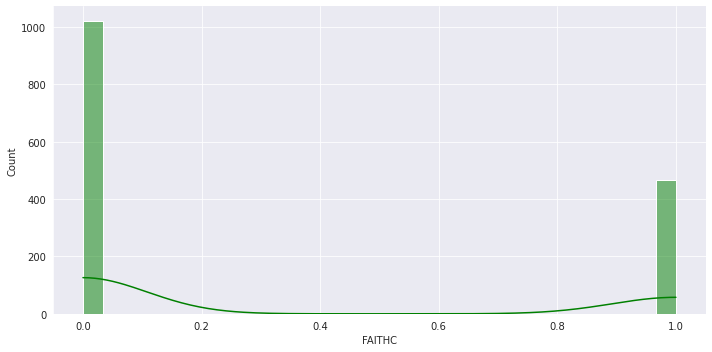

<Figure size 4200x1800 with 0 Axes>

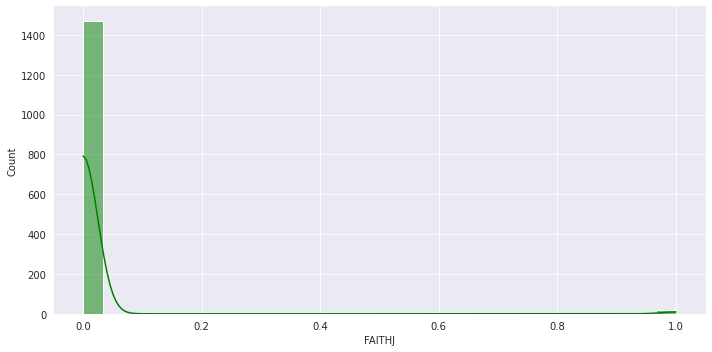

<Figure size 4200x1800 with 0 Axes>

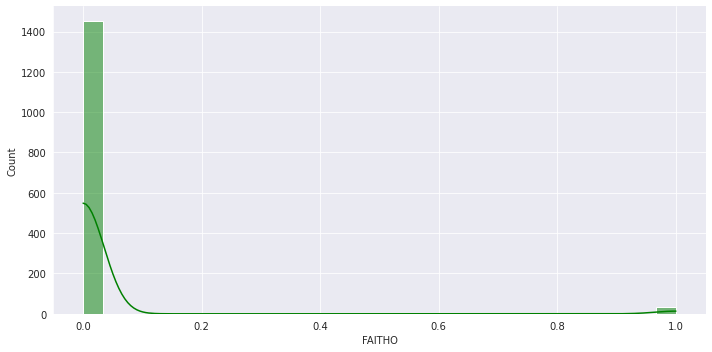

<Figure size 4200x1800 with 0 Axes>

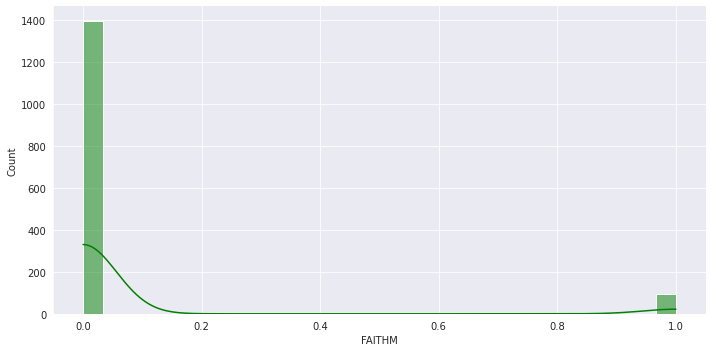

<Figure size 4200x1800 with 0 Axes>

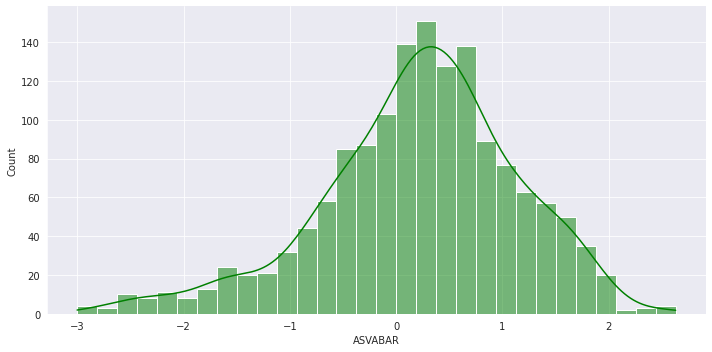

<Figure size 4200x1800 with 0 Axes>

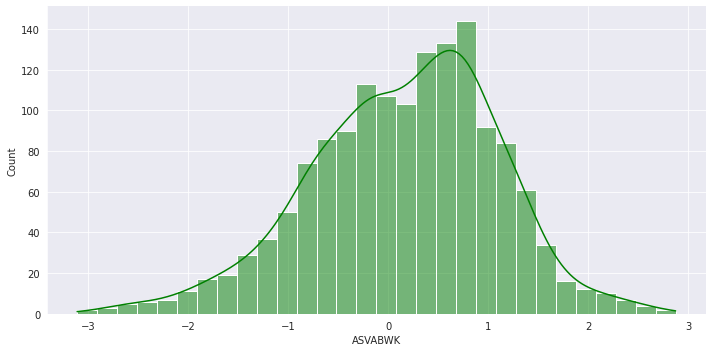

<Figure size 4200x1800 with 0 Axes>

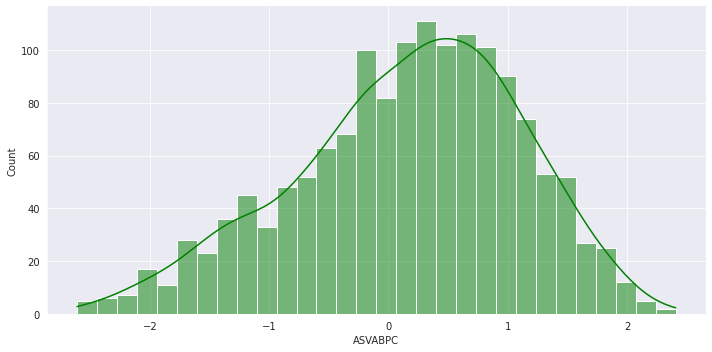

<Figure size 4200x1800 with 0 Axes>

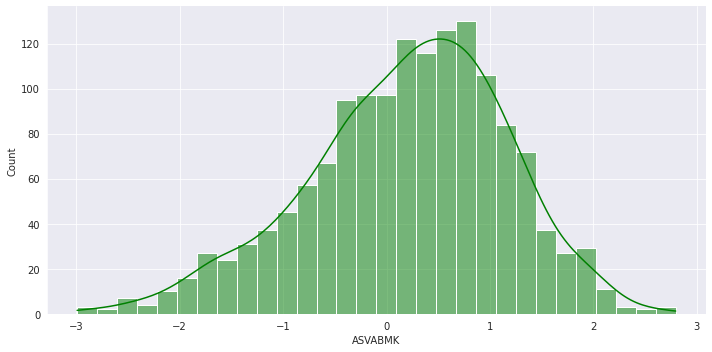

<Figure size 4200x1800 with 0 Axes>

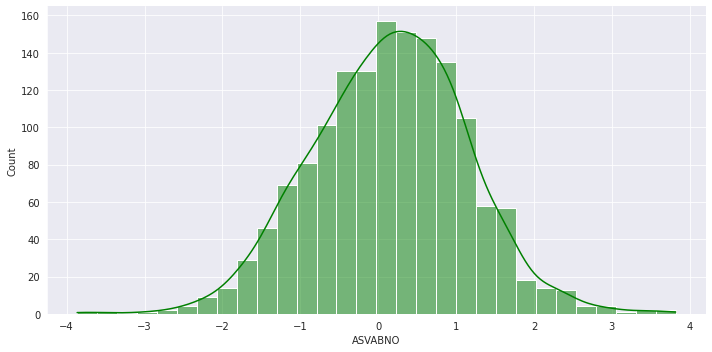

<Figure size 4200x1800 with 0 Axes>

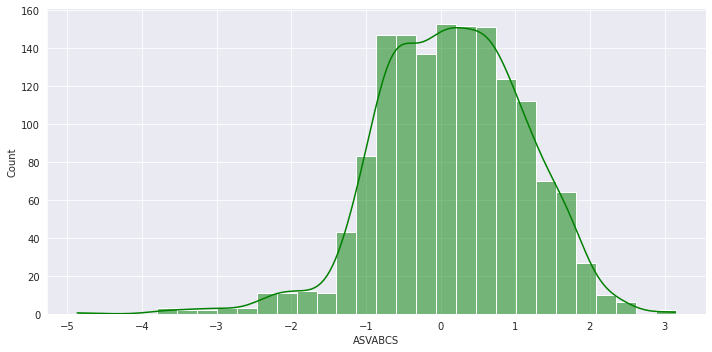

<Figure size 4200x1800 with 0 Axes>

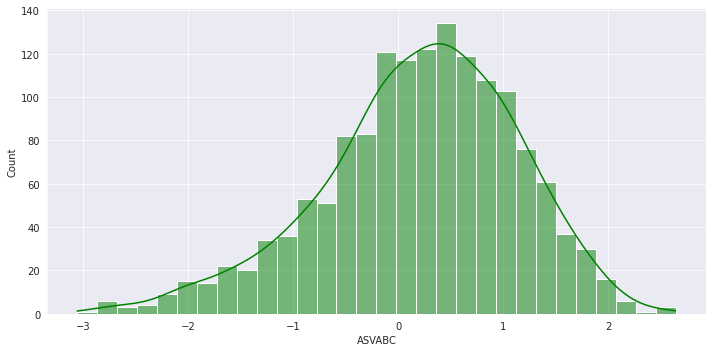

<Figure size 4200x1800 with 0 Axes>

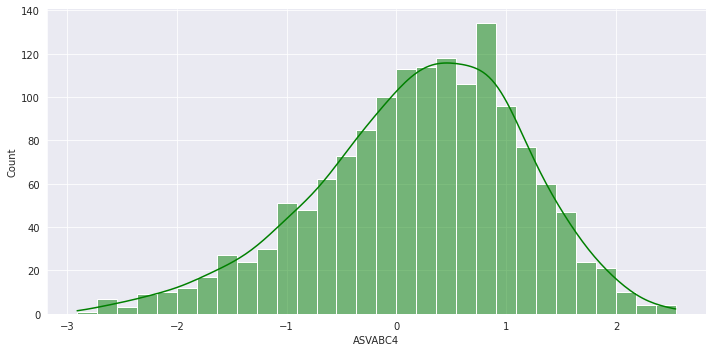

<Figure size 4200x1800 with 0 Axes>

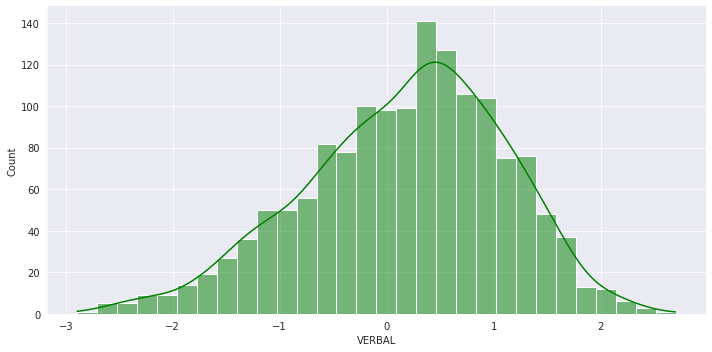

<Figure size 4200x1800 with 0 Axes>

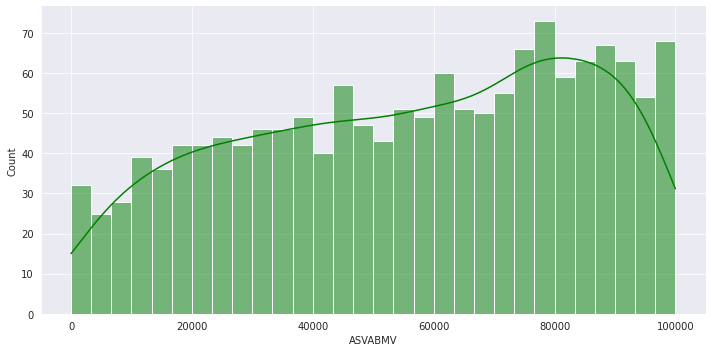

<Figure size 4200x1800 with 0 Axes>

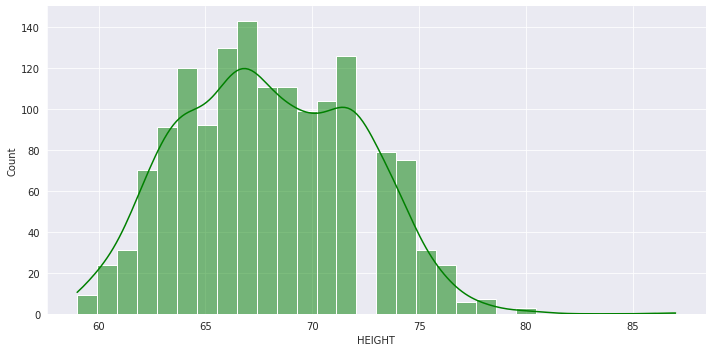

<Figure size 4200x1800 with 0 Axes>

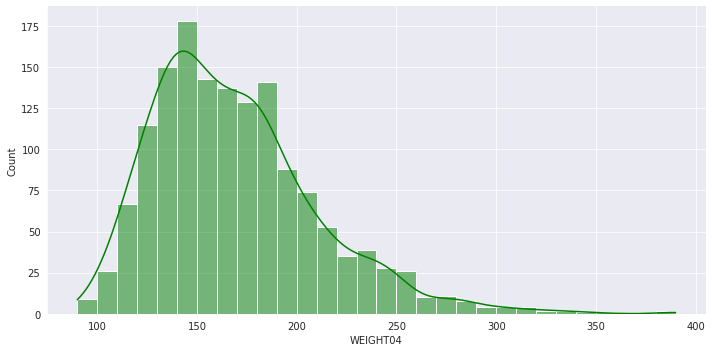

<Figure size 4200x1800 with 0 Axes>

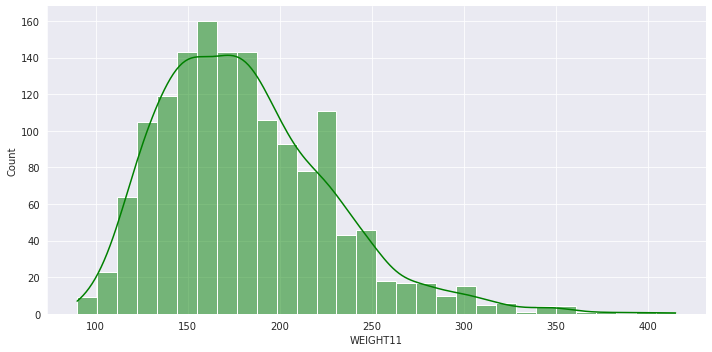

<Figure size 4200x1800 with 0 Axes>

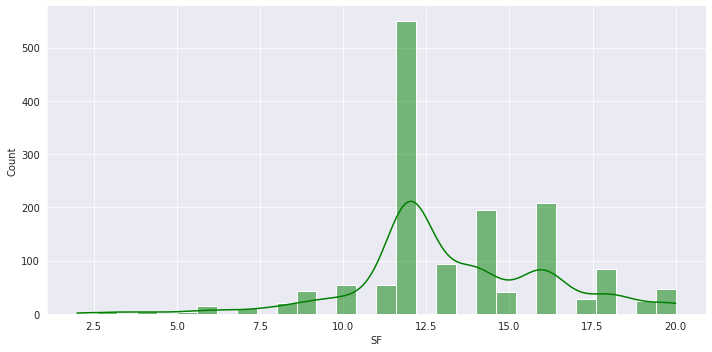

<Figure size 4200x1800 with 0 Axes>

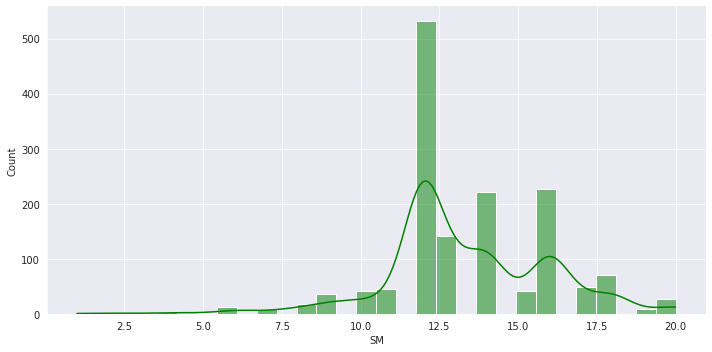

<Figure size 4200x1800 with 0 Axes>

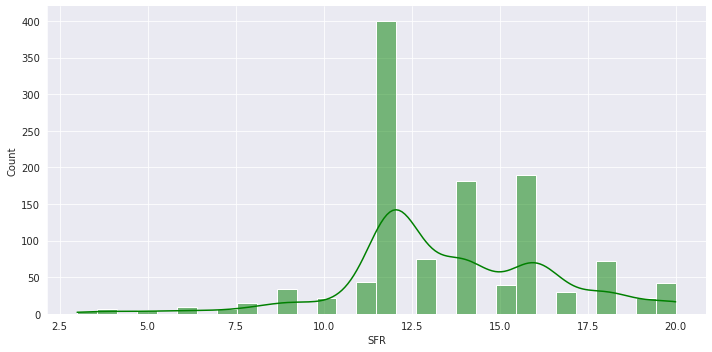

<Figure size 4200x1800 with 0 Axes>

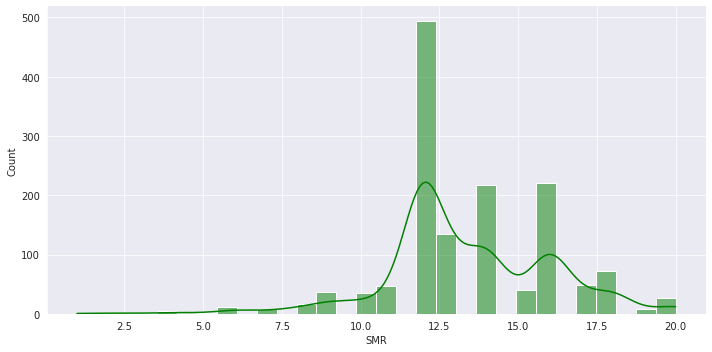

<Figure size 4200x1800 with 0 Axes>

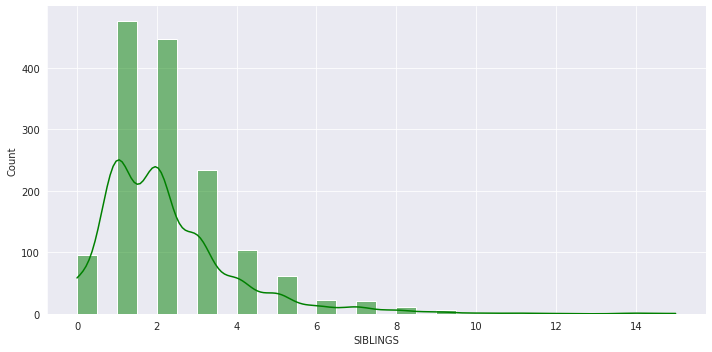

<Figure size 4200x1800 with 0 Axes>

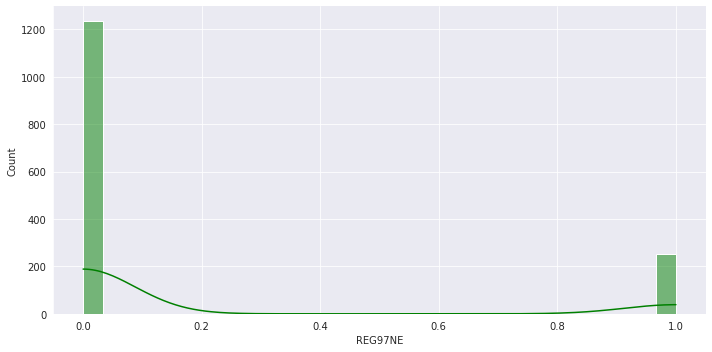

<Figure size 4200x1800 with 0 Axes>

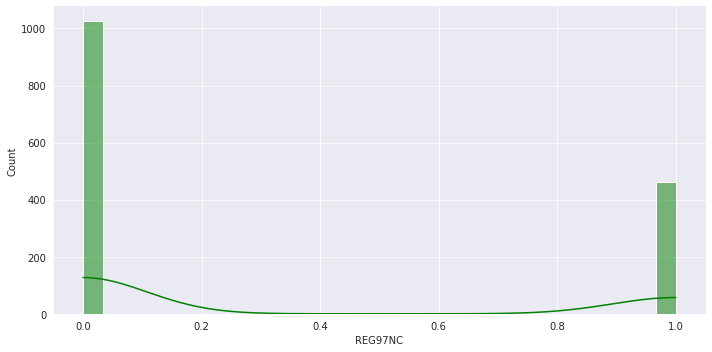

<Figure size 4200x1800 with 0 Axes>

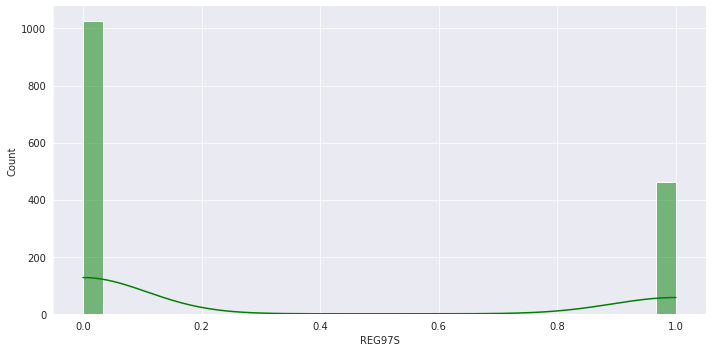

<Figure size 4200x1800 with 0 Axes>

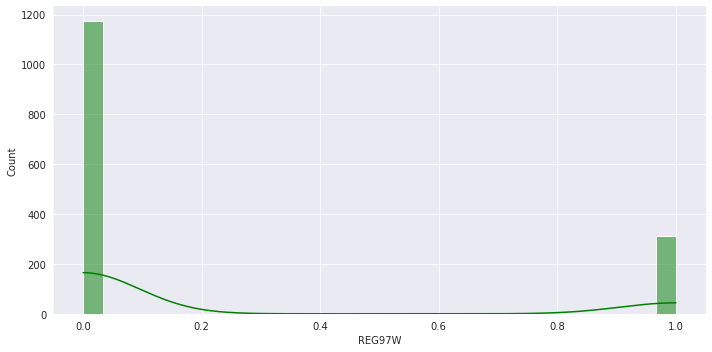

<Figure size 4200x1800 with 0 Axes>

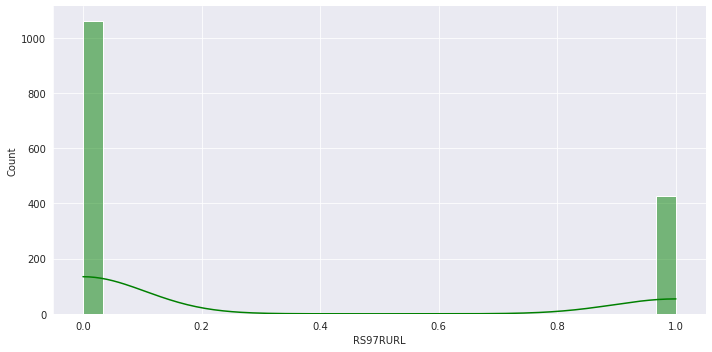

<Figure size 4200x1800 with 0 Axes>

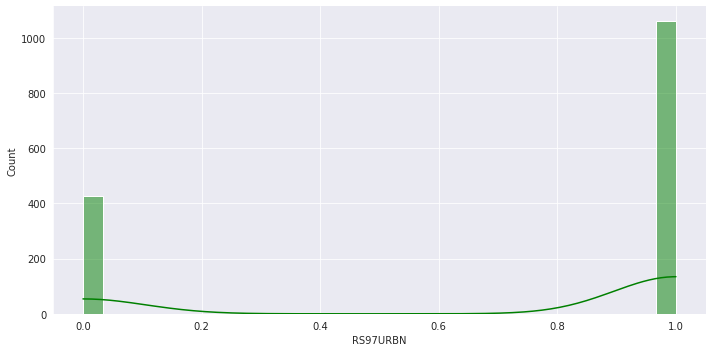

<Figure size 4200x1800 with 0 Axes>

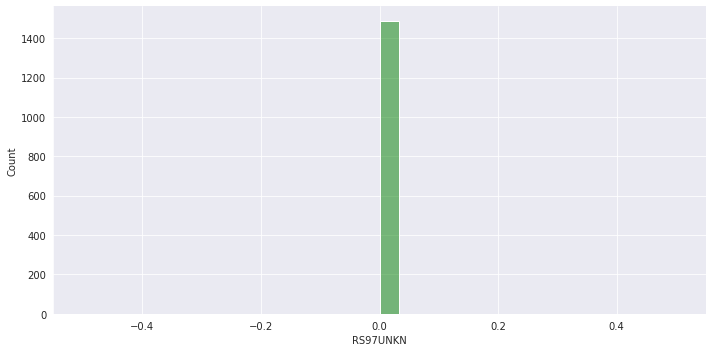

<Figure size 4200x1800 with 0 Axes>

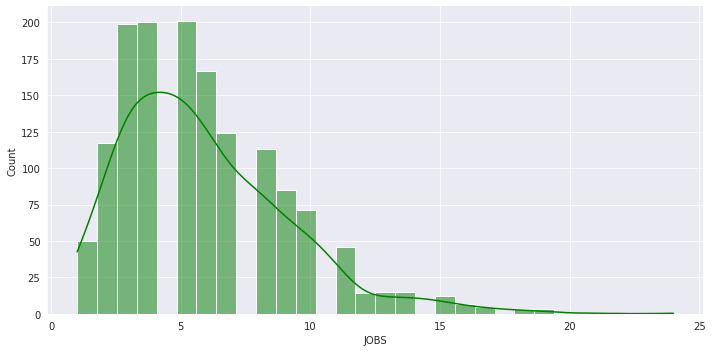

<Figure size 4200x1800 with 0 Axes>

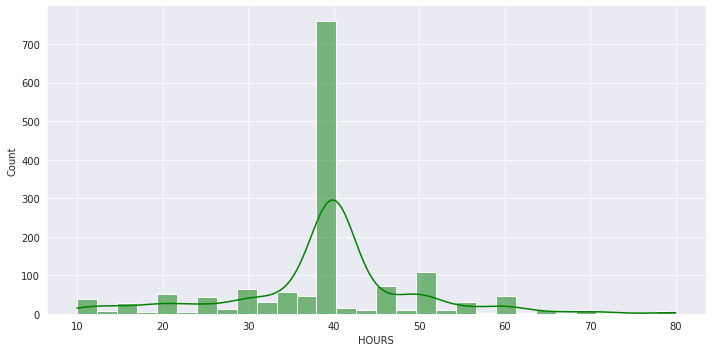

<Figure size 4200x1800 with 0 Axes>

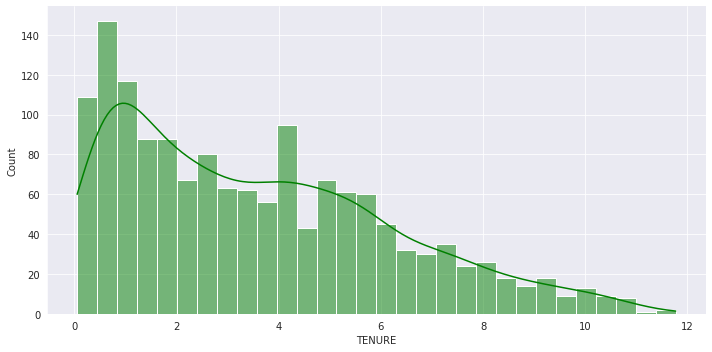

<Figure size 4200x1800 with 0 Axes>

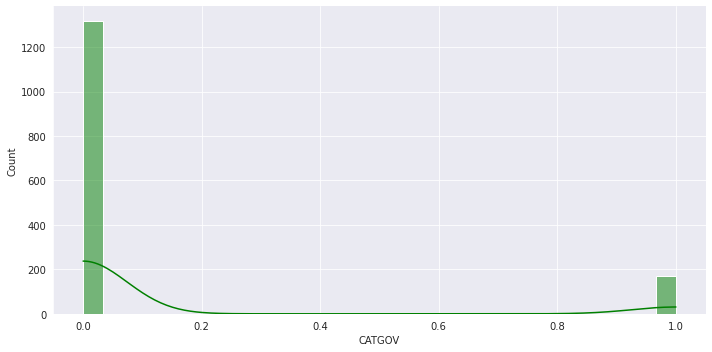

<Figure size 4200x1800 with 0 Axes>

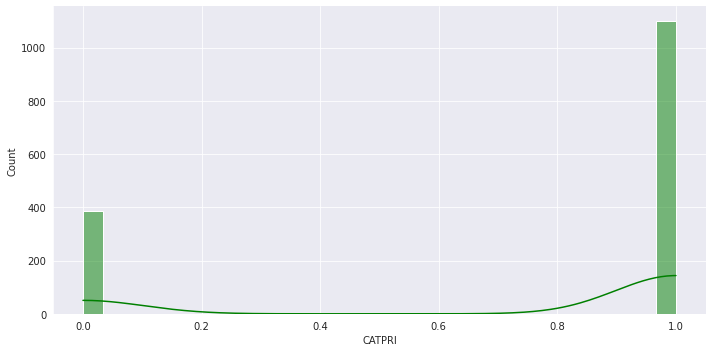

<Figure size 4200x1800 with 0 Axes>

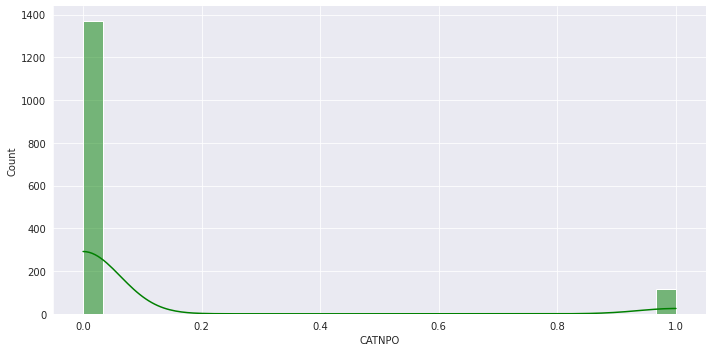

<Figure size 4200x1800 with 0 Axes>

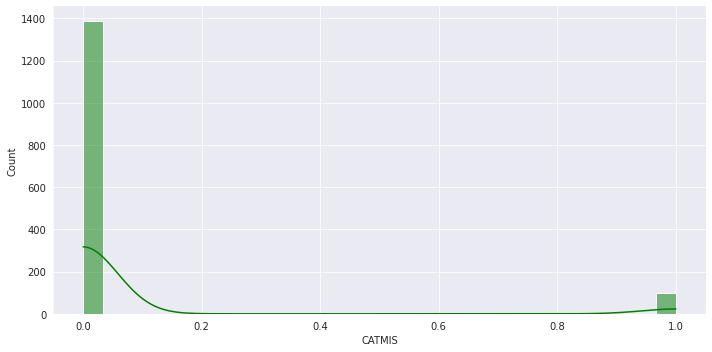

<Figure size 4200x1800 with 0 Axes>

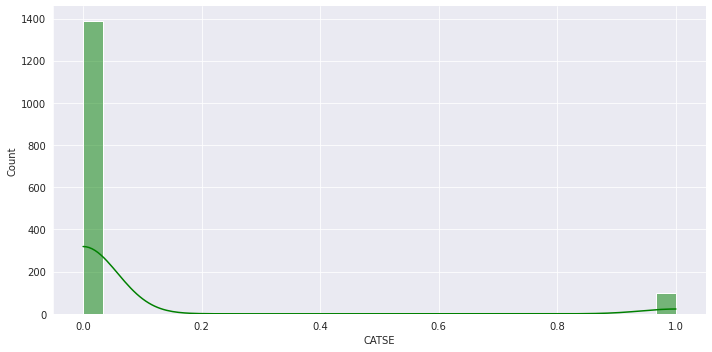

<Figure size 4200x1800 with 0 Axes>

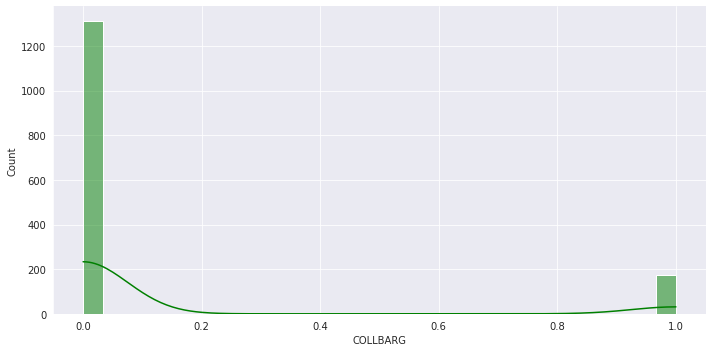

<Figure size 4200x1800 with 0 Axes>

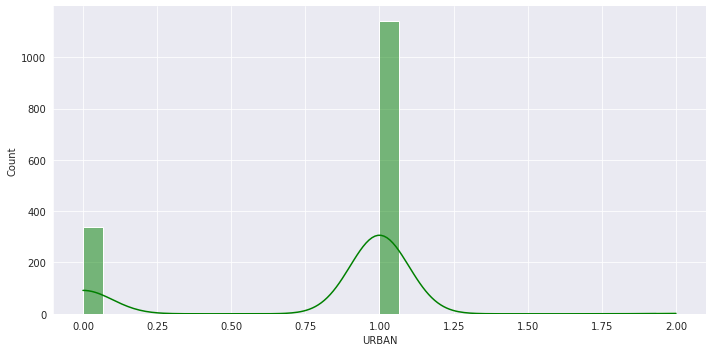

<Figure size 4200x1800 with 0 Axes>

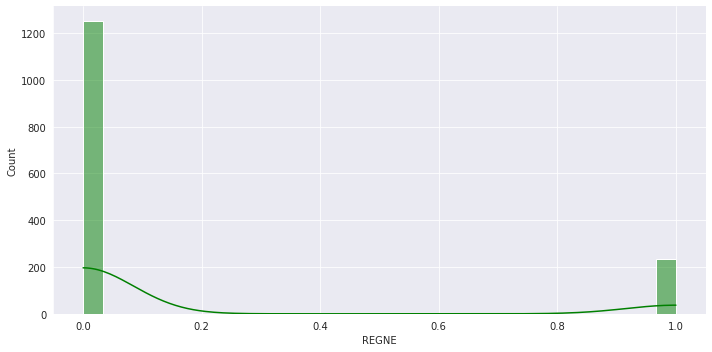

<Figure size 4200x1800 with 0 Axes>

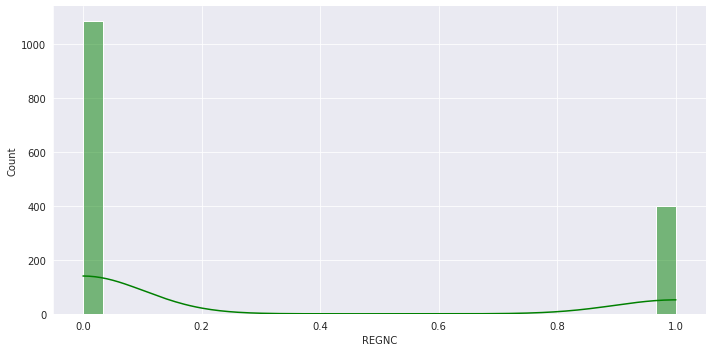

<Figure size 4200x1800 with 0 Axes>

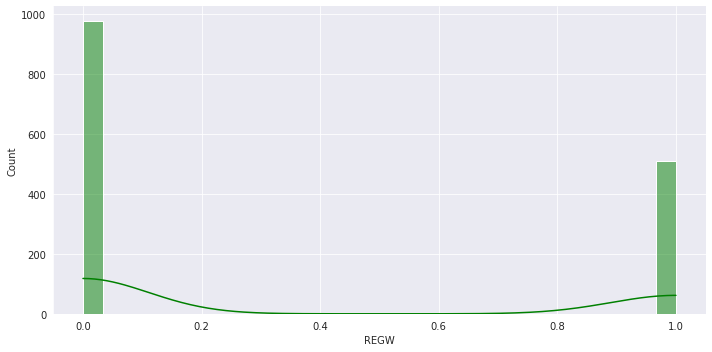

<Figure size 4200x1800 with 0 Axes>

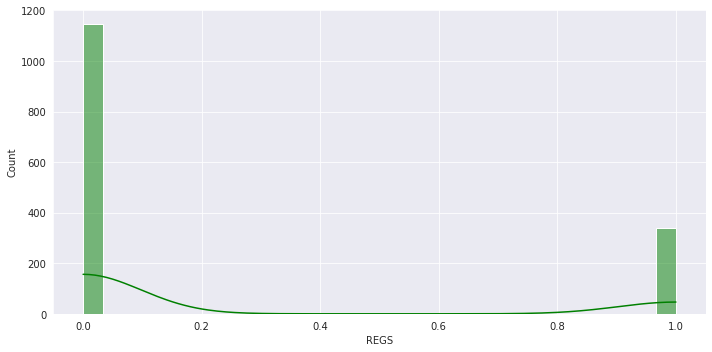

<Figure size 4200x1800 with 0 Axes>

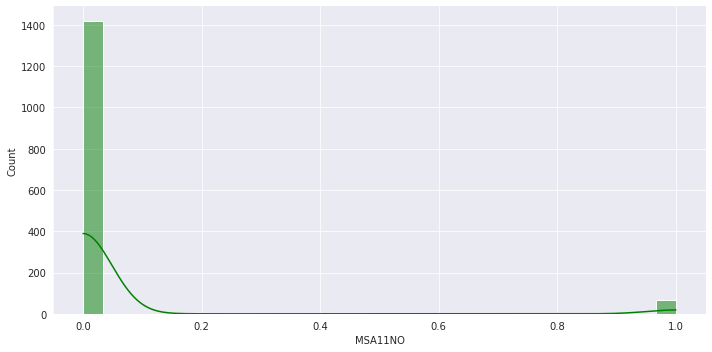

<Figure size 4200x1800 with 0 Axes>

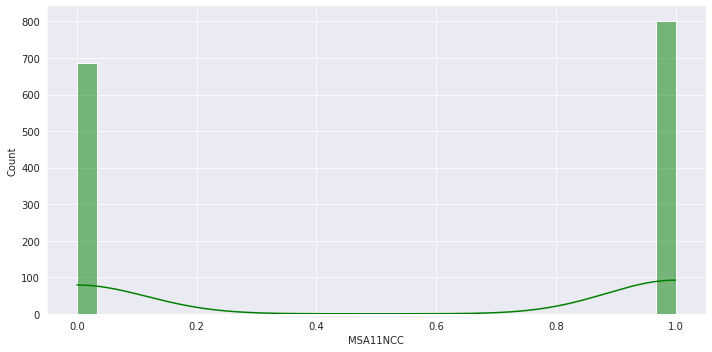

<Figure size 4200x1800 with 0 Axes>

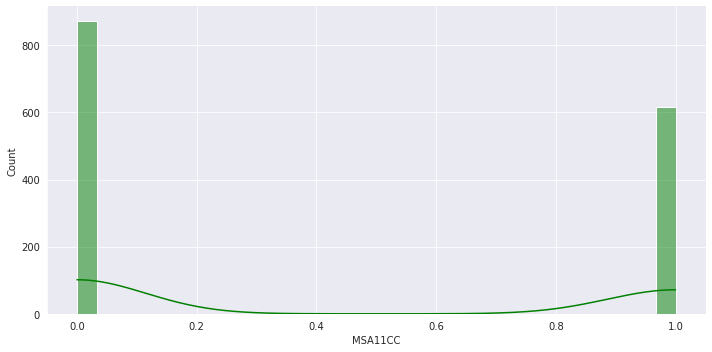

<Figure size 4200x1800 with 0 Axes>

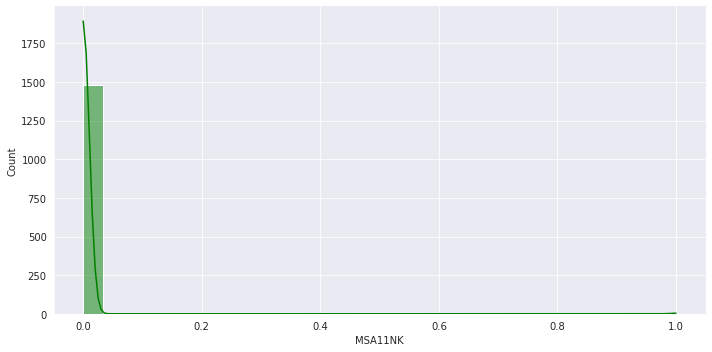

<Figure size 4200x1800 with 0 Axes>

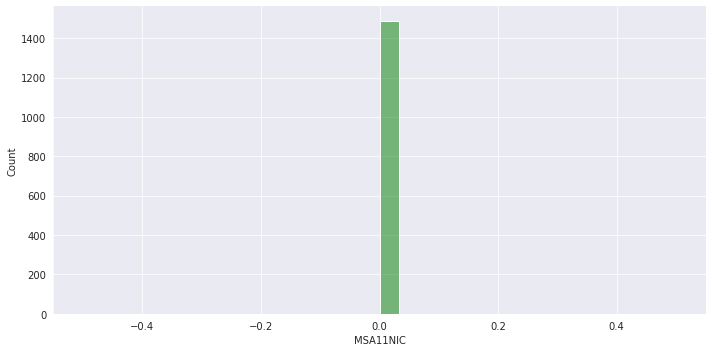

In [18]:
for column in data.columns.values:
  plt.figure(figsize=(14,6), dpi=300)
  with sns.axes_style('darkgrid'):
    sns.displot(data=data, x=column, aspect=2, kde=True, color='green', bins=30)
  plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [22]:
features = data.drop('EARNINGS', axis=1)
target = data['EARNINGS']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                     random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [23]:
regression = LinearRegression()
regression.fit(X_train[['S']], y_train)

rsquared = regression.score(X_train[['S']], y_train)
print(f"Training data r-squared: {rsquared:.3}")


Training data r-squared: 0.0809


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [25]:
regr_coef = pd.DataFrame(data=regression.coef_, index=X_train[['S']].columns, columns=['Coefficient'])

print(regr_coef)

   Coefficient
S         1.22


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [26]:

predicted_vals = regression.predict(X_train[['S']])
residuals = y_train - predicted_vals
     

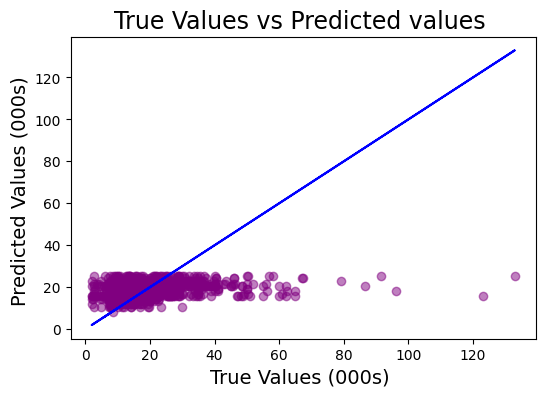

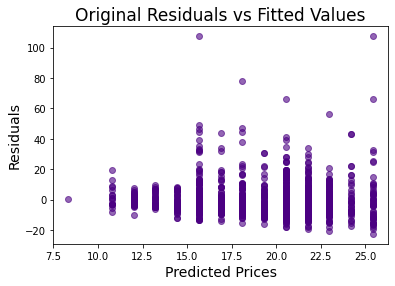

In [29]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, color='purple', alpha=0.5)
plt.plot(y_train, y_train, color='blue')
plt.title("True Values vs Predicted values ", fontsize=17)
plt.xlabel("True Values (000s) ", fontsize=14)
plt.ylabel("Predicted Values (000s) ", fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title("Original Residuals vs Fitted Values", fontsize=17)
plt.xlabel("Predicted Prices", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()
     

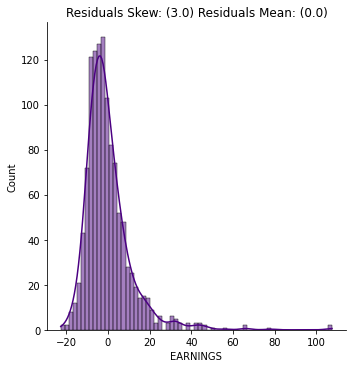

In [30]:
residuals_mean = round(residuals.mean(), 2)
residuals_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew: ({residuals_skew}) Residuals Mean: ({residuals_mean})')
plt.show()
     

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [35]:
reg = LinearRegression()


In [36]:

reg.fit(X_train[['S', 'EXP']], y_train)

r_square = reg.score(X_train[['S', 'EXP']], y_train)
print(f"The R-squared of the training data is: {r_square:.3}.")

The R-squared of the training data is: 0.117.


### Evaluate the Coefficients of the Model

In [37]:

reg_coef = pd.DataFrame(data=reg.coef_, index=X_train[['S', 'EXP']].columns, columns=['Coef'])
reg_coef

,Coef
S,1.79
EXP,0.98


### Analyse the Estimated Values & Regression Residuals

In [40]:

predicted_valuess = reg.predict(X_train[['S', 'EXP']])
residuals = y_train - predicted_vals

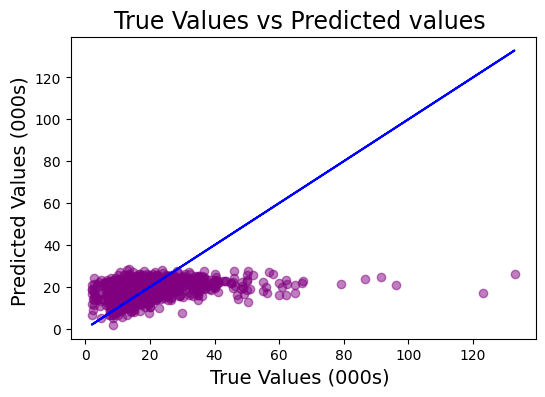

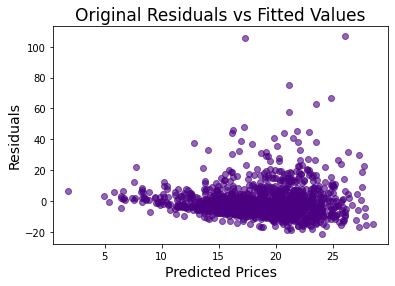

In [41]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, color='purple', alpha=0.5)
plt.plot(y_train, y_train, color='blue')
plt.title("True Values vs Predicted values ", fontsize=17)
plt.xlabel("True Values (000s) ", fontsize=14)
plt.ylabel("Predicted Values (000s) ", fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [42]:
features = data.drop(['EARNINGS'], axis=1)
average_vals = features.mean().values
earnings_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
earnings_stats

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,"3,547.13",14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",362.26,...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00


In [46]:
earnings_stats['S'] = 12 + 4
earnings_stats['EXP'] = 5

estimated = reg.predict(earnings_stats[['S', 'EXP']])[0]
print(f'The earning estimate is {estimated:.3} (Thousands USD)')

The earning estimate is 19.7 (Thousands USD)


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [47]:
features = data.drop('EARNINGS', axis=1)
target = np.log(data['EARNINGS'])


X_train, X_test, log_y_train, log_y_test = train_test_split(features, target, test_size=0.2,
                                                     random_state=10)

In [48]:
log_regr = LinearRegression()
log_regr.fit(X_train[['S']], log_y_train)

log_rsquared = log_regr.score(X_train[['S']], log_y_train)
print(f"Log training data r-squared: {log_rsquared:.3}")

log_predictions = log_regr.predict(X_train[['S']])
log_residuals = (log_y_train - log_predictions)

Log training data r-squared: 0.102
